In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
df = pd.read_csv('../data/ready/ADA.csv',index_col='time').dropna().drop('Unnamed: 0', axis = 1)

In [28]:
df.head(50)

,BTC_open,BTC_close,BTC_volume,ADA_open,ADA_close,ADA_volume,perc_BTC_change_1hr,perc_BTC_change_2hr,perc_BTC_change_3hr,perc_BTC_change_4hr,perc_BTC_change_5hr,perc_BTC_change_6hr,perc_ADA_change_1hr,perc_ADA_change_2hr,perc_ADA_change_3hr,perc_ADA_change_4hr,perc_ADA_change_5hr,perc_ADA_change_6hr,lag_time,met_threshold
time,,,,,,,,,,,,,,,,,,,,
2017-11-12 07:00:00,5616.67,6138.88,1.715678e+08,0.02275,0.02541,741474.38,9.296918,5.205359,2.219092,1.160260,-0.743589,-0.903652,11.692308,4.182042,0.993641,0.673534,-3.089245,-5.044843,0 days 04:00:00,1.0
2017-11-29 21:00:00,9509.08,10194.60,1.320960e+08,0.09007,0.10630,151671.81,7.199302,6.645215,-1.740595,-3.808648,-6.029640,-6.164053,18.019318,10.786868,-0.468165,15.581168,15.468173,-8.911740,0 days 04:00:00,1.0
2017-12-08 14:00:00,15114.61,15870.89,2.090432e+08,0.10350,0.10590,96277.56,5.003636,5.944579,6.429111,5.719737,3.208049,1.424788,2.318841,4.437870,3.317073,3.519062,4.851485,2.121504,0 days 03:00:00,1.0
2017-12-09 18:00:00,13439.54,14322.63,2.281000e+08,0.11520,0.11950,71460.85,6.544119,0.131713,-2.770597,-4.931755,-5.940056,-3.747125,4.094077,-5.233941,-10.352588,-6.200942,-3.473344,-0.333611,0 days 04:00:00,1.0
2017-12-10 13:00:00,13952.22,14864.81,1.416254e+08,0.10970,0.11500,39098.52,6.562972,7.371880,7.260159,8.104014,9.961378,8.670265,4.831358,5.990783,7.476636,6.481481,6.580167,7.778819,0 days 00:00:00,1.0
2017-12-20 02:00:00,16297.59,17214.50,2.774156e+08,0.42090,0.51730,918608.53,5.627278,1.784458,-1.764468,0.418193,1.442571,-2.149088,22.903302,10.298507,-2.045067,-0.576590,3.335997,-4.486706,0 days 04:00:00,1.0
2017-12-22 15:00:00,12087.83,12966.90,4.181291e+08,0.31300,0.37680,929201.25,7.353263,7.706288,-4.399415,-5.622791,-7.375647,-5.380862,20.653218,16.368128,0.079681,-3.730199,-3.508323,-6.663364,0 days 04:00:00,1.0
2017-12-22 22:00:00,13947.55,14832.74,1.949746e+08,0.41050,0.44680,731120.33,6.346563,4.324922,12.183884,10.791140,14.925641,16.324997,8.842875,6.838833,13.776420,12.289520,20.139823,18.294943,0 days 00:00:00,1.0
2017-12-30 17:00:00,12112.68,12788.79,1.310587e+08,0.55800,0.61300,379009.59,5.597965,2.073754,1.598077,1.274485,0.020413,-4.575938,9.464286,3.898305,3.722504,6.608696,5.689655,-1.304138,0 days 04:00:00,1.0


In [29]:
target = df['met_threshold']
features = df.drop(['met_threshold','lag_time'], axis=1)

In [30]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [31]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [32]:
met_threshold_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(features_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
met_threshold_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history = met_threshold_model.fit(features_train, target_train, epochs=10, validation_data=(features_test, target_test))

Epoch 1/10
2/2 [==============================] - 1s 118ms/step - loss: 0.6361 - accuracy: 0.7500 - val_loss: 0.5412 - val_accuracy: 0.9091
Epoch 2/10
2/2 [==============================] - 0s 25ms/step - loss: 0.5962 - accuracy: 0.8409 - val_loss: 0.4795 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 0s 26ms/step - loss: 0.5383 - accuracy: 0.9091 - val_loss: 0.4278 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 0s 23ms/step - loss: 0.4783 - accuracy: 0.9545 - val_loss: 0.3825 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 0s 27ms/step - loss: 0.4300 - accuracy: 0.9545 - val_loss: 0.3421 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 0s 23ms/step - loss: 0.4048 - accuracy: 0.9545 - val_loss: 0.3078 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 24ms/step - loss: 0.3772 - accuracy: 0.9545 - val_loss: 0.2796 - val_accuracy: 1.0000
Epoch 8/10
2/2 [==========

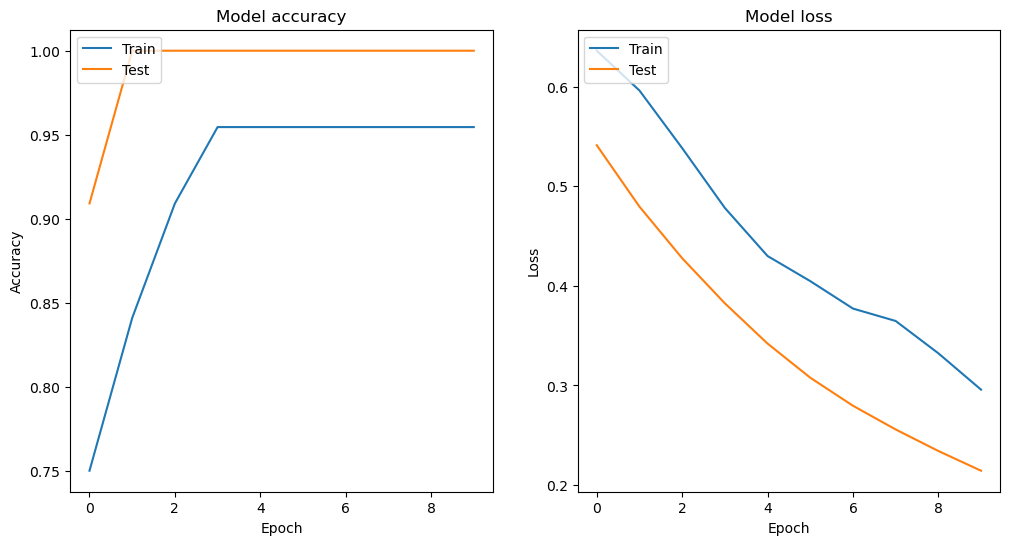

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [36]:
predictions = met_threshold_model.predict(features)
predicted_classes = (predictions > 0.5).astype('int32')

2/2 [==============================] - 0s 2ms/step


Accuracy: 96.36363636363636%


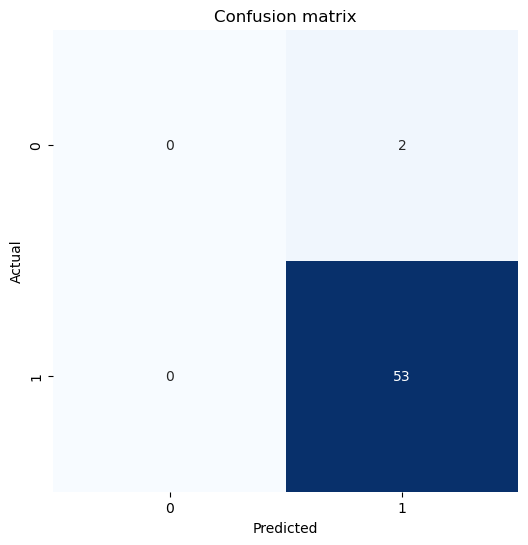

In [37]:
accuracy = accuracy_score(target, predicted_classes)
print(f"Accuracy: {accuracy * 100}%")

cm = confusion_matrix(target, predicted_classes)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [38]:
df_predicted = df.copy()
df_predicted['met_threshold'] = predicted_classes
df_predicted['lag_time'] = pd.to_timedelta(df['lag_time']).dt.total_seconds() / 3600

In [39]:
features = df_predicted.drop('lag_time', axis=1)
target = df_predicted['lag_time']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [40]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [41]:
lag_model = Sequential([
    Dense(64, activation='relu', input_shape=(features_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1)
])

In [42]:
lag_model.compile(optimizer=Adam(0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = lag_model.fit(features_train, target_train, 
                    epochs=100, 
                    validation_data=(features_test, target_test),
                    callbacks=[early_stop])


Epoch 1/100
2/2 [==============================] - 1s 102ms/step - loss: 7.7666 - val_loss: 7.6338
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 7.1366 - val_loss: 6.8949
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 6.1502 - val_loss: 6.2607
Epoch 4/100
2/2 [==============================] - 0s 23ms/step - loss: 5.9085 - val_loss: 5.6886
Epoch 5/100
2/2 [==============================] - 0s 23ms/step - loss: 5.5950 - val_loss: 5.1771
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 4.5222 - val_loss: 4.7541
Epoch 7/100
2/2 [==============================] - 0s 22ms/step - loss: 4.4956 - val_loss: 4.4015
Epoch 8/100
2/2 [==============================] - 0s 24ms/step - loss: 4.4837 - val_loss: 4.0925
Epoch 9/100
2/2 [==============================] - 0s 24ms/step - loss: 4.5776 - val_loss: 3.8352
Epoch 10/100
2/2 [==============================] - 0s 23ms/step - loss: 3.9825 - val_loss: 3.6265
Epoch 11/100
2/2 [

1/1 [==============================] - 0s 39ms/step


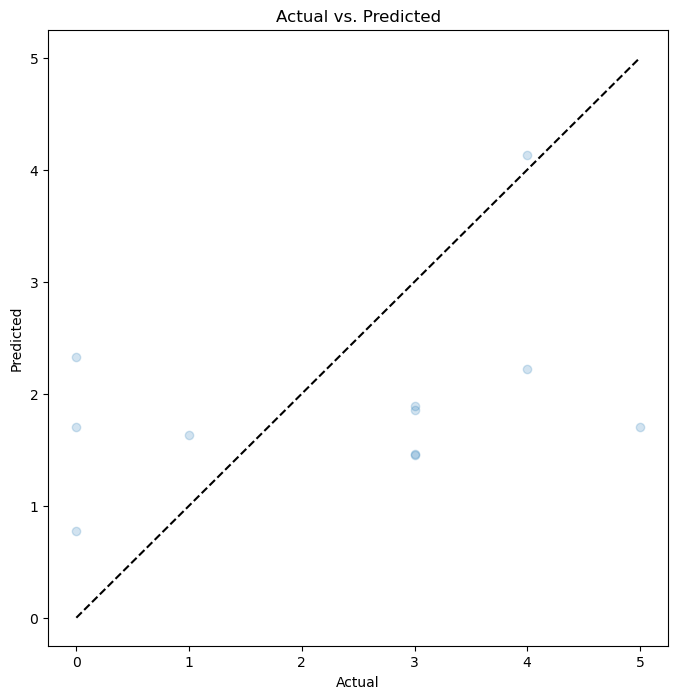

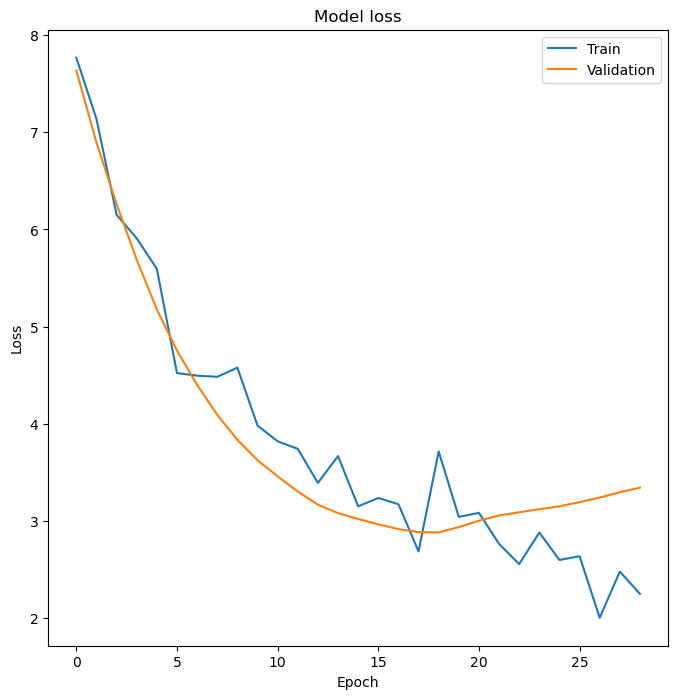

In [43]:
# Make predictions on the test set
predictions_test = lag_model.predict(features_test)

# Create a scatter plot of the actual versus predicted values
plt.figure(figsize=(8, 8))
plt.scatter(target_test, predictions_test, alpha=0.2)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Create a plot of the training and validation loss
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [44]:
df_predicted

,BTC_open,BTC_close,BTC_volume,ADA_open,ADA_close,ADA_volume,perc_BTC_change_1hr,perc_BTC_change_2hr,perc_BTC_change_3hr,perc_BTC_change_4hr,perc_BTC_change_5hr,perc_BTC_change_6hr,perc_ADA_change_1hr,perc_ADA_change_2hr,perc_ADA_change_3hr,perc_ADA_change_4hr,perc_ADA_change_5hr,perc_ADA_change_6hr,lag_time,met_threshold
time,,,,,,,,,,,,,,,,,,,,
2017-11-12 07:00:00,5616.67,6138.88,1.715678e+08,0.02275,0.02541,741474.38,9.296918,5.205359,2.219092,1.160260,-0.743589,-0.903652,11.692308,4.182042,0.993641,0.673534,-3.089245,-5.044843,4.0,1
2017-11-29 21:00:00,9509.08,10194.60,1.320960e+08,0.09007,0.10630,151671.81,7.199302,6.645215,-1.740595,-3.808648,-6.029640,-6.164053,18.019318,10.786868,-0.468165,15.581168,15.468173,-8.911740,4.0,1
2017-12-08 14:00:00,15114.61,15870.89,2.090432e+08,0.10350,0.10590,96277.56,5.003636,5.944579,6.429111,5.719737,3.208049,1.424788,2.318841,4.437870,3.317073,3.519062,4.851485,2.121504,3.0,1
2017-12-09 18:00:00,13439.54,14322.63,2.281000e+08,0.11520,0.11950,71460.85,6.544119,0.131713,-2.770597,-4.931755,-5.940056,-3.747125,4.094077,-5.233941,-10.352588,-6.200942,-3.473344,-0.333611,4.0,1
2017-12-10 13:00:00,13952.22,14864.81,1.416254e+08,0.10970,0.11500,39098.52,6.562972,7.371880,7.260159,8.104014,9.961378,8.670265,4.831358,5.990783,7.476636,6.481481,6.580167,7.778819,0.0,1
2017-12-20 02:00:00,16297.59,17214.50,2.774156e+08,0.42090,0.51730,918608.53,5.627278,1.784458,-1.764468,0.418193,1.442571,-2.149088,22.903302,10.298507,-2.045067,-0.576590,3.335997,-4.486706,4.0,1
2017-12-22 15:00:00,12087.83,12966.90,4.181291e+08,0.31300,0.37680,929201.25,7.353263,7.706288,-4.399415,-5.622791,-7.375647,-5.380862,20.653218,16.368128,0.079681,-3.730199,-3.508323,-6.663364,4.0,1
2017-12-22 22:00:00,13947.55,14832.74,1.949746e+08,0.41050,0.44680,731120.33,6.346563,4.324922,12.183884,10.791140,14.925641,16.324997,8.842875,6.838833,13.776420,12.289520,20.139823,18.294943,0.0,1
2017-12-30 17:00:00,12112.68,12788.79,1.310587e+08,0.55800,0.61300,379009.59,5.597965,2.073754,1.598077,1.274485,0.020413,-4.575938,9.464286,3.898305,3.722504,6.608696,5.689655,-1.304138,4.0,1


In [45]:
features_scaled = scaler.transform(features)
predictions_all = lag_model.predict(features_scaled)
df_predicted['lag_time'] = np.around(predictions_all).flatten()
df_predicted.head()

2/2 [==============================] - 0s 2ms/step


,BTC_open,BTC_close,BTC_volume,ADA_open,ADA_close,ADA_volume,perc_BTC_change_1hr,perc_BTC_change_2hr,perc_BTC_change_3hr,perc_BTC_change_4hr,perc_BTC_change_5hr,perc_BTC_change_6hr,perc_ADA_change_1hr,perc_ADA_change_2hr,perc_ADA_change_3hr,perc_ADA_change_4hr,perc_ADA_change_5hr,perc_ADA_change_6hr,lag_time,met_threshold
time,,,,,,,,,,,,,,,,,,,,
2017-11-12 07:00:00,5616.67,6138.88,1.715678e+08,0.02275,0.02541,741474.38,9.296918,5.205359,2.219092,1.160260,-0.743589,-0.903652,11.692308,4.182042,0.993641,0.673534,-3.089245,-5.044843,3.0,1
2017-11-29 21:00:00,9509.08,10194.60,1.320960e+08,0.09007,0.10630,151671.81,7.199302,6.645215,-1.740595,-3.808648,-6.029640,-6.164053,18.019318,10.786868,-0.468165,15.581168,15.468173,-8.911740,5.0,1
2017-12-08 14:00:00,15114.61,15870.89,2.090432e+08,0.10350,0.10590,96277.56,5.003636,5.944579,6.429111,5.719737,3.208049,1.424788,2.318841,4.437870,3.317073,3.519062,4.851485,2.121504,1.0,1
2017-12-09 18:00:00,13439.54,14322.63,2.281000e+08,0.11520,0.11950,71460.85,6.544119,0.131713,-2.770597,-4.931755,-5.940056,-3.747125,4.094077,-5.233941,-10.352588,-6.200942,-3.473344,-0.333611,4.0,1
2017-12-10 13:00:00,13952.22,14864.81,1.416254e+08,0.10970,0.11500,39098.52,6.562972,7.371880,7.260159,8.104014,9.961378,8.670265,4.831358,5.990783,7.476636,6.481481,6.580167,7.778819,1.0,1


In [46]:
df_predicted.to_csv('../data/predictions/ADA_predicted.csv')